## Reading in medical file 

In [184]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sws
import numpy as np


df = pd.read_csv("medical_examination.csv")

## Looking at data

In [52]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## calculating BMI and determining if overweight/normalizing gluc and cholesterol numbers

In [172]:
df['Overweight'] = df['weight'] / (df['height']/100) ** 2

df.loc[df['Overweight'] < 25, 'Overweight'] = 0
df.loc[df['Overweight'] >= 25, 'Overweight'] = 1


In [173]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1


In [165]:
long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Overweight'])

long = long.groupby(['cardio', 'variable', 'value']).size().reset_index() 
long = long.rename(columns={0: 'Total'})

long



,cardio,variable,value,Total
0,0,Overweight,0.0,15908
1,0,Overweight,1.0,19113
2,0,active,0.0,6378
3,0,active,1.0,28643
4,0,alco,0.0,33080
5,0,alco,1.0,1941
6,0,cholesterol,0.0,29330
7,0,cholesterol,1.0,5691
8,0,gluc,0.0,30894
9,0,gluc,1.0,4127


## Creating seaborn catplot to compare overweight and cardio across 6 categories

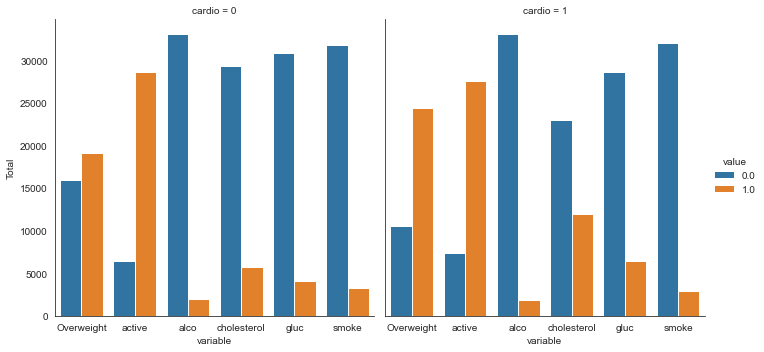

In [166]:
sws.catplot(x='variable', y='Total', kind = 'bar',hue='value', data = long, col = 'cardio')
sws.set_style('white')

## Cleaning data set

In [178]:
df = df.drop(df[df['ap_lo'] > df['ap_hi']].index)
df = df.drop(df[(df['height'] < df['height'].quantile(0.025))].index)
df = df.drop(df[(df['height'] > df['height'].quantile(0.975))].index)
df = df.drop(df[(df['weight'] < df['weight'].quantile(0.025))].index)
df = df.drop(df[(df['weight'] > df['weight'].quantile(0.975))].index)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


## correlation matrix

In [205]:
heat = df.corr()
mask = np.triu(np.ones_like(heat, dtype=bool))




array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

<AxesSubplot:>

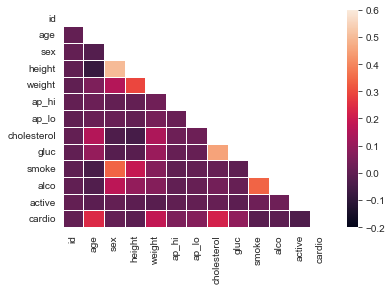

In [201]:
sws.heatmap(heat, mask=mask, linewidths=.5, vmin=-.2, vmax=.6)